In [1]:
import numpy as np
from keras.utils import to_categorical
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

### Shape of data

https://www.bbci.de/competition/iv/desc_2a.pdf

In [2]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

y_train_valid -= 769
y_test -= 769

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [12]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print(y)
    print('Shape of X after trimming:',X.shape, y.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape, total_y.shape)
    return total_X,total_y


X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid, y_train_valid, 2, 2, True)


[2 3 0 ... 3 3 2]
Shape of X after trimming: (2115, 22, 500) (2115,)
Shape of X after maxpooling: (2115, 22, 250)
Shape of X after averaging+noise and concatenating: (4230, 22, 250)
Shape of X after subsampling and concatenating: (8460, 22, 250) (8460,)


In [4]:
ind_valid = np.random.choice(2115, 375, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]


## Preprocessing the dataset
x_train,y_train = data_prep(X_train,y_train,2,2,True)
x_valid,y_valid = data_prep(X_valid,y_valid,2,2,True)
X_test_prep,y_test_prep = data_prep(X_test,y_test,2,2,True)


print('Shape of testing set:',X_test_prep.shape)
print('Shape of testing labels:',y_test_prep.shape)

print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)



# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test_prep, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

Shape of X after trimming: (1740, 22, 500) (1740,)
Shape of X after maxpooling: (1740, 22, 250)
Shape of X after averaging+noise and concatenating: (3480, 22, 250)
Shape of X after subsampling and concatenating: (6960, 22, 250)
Shape of X after trimming: (375, 22, 500) (375,)
Shape of X after maxpooling: (375, 22, 250)
Shape of X after averaging+noise and concatenating: (750, 22, 250)
Shape of X after subsampling and concatenating: (1500, 22, 250)
Shape of X after trimming: (443, 22, 500) (443,)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training set: (6960, 22, 250)
Shape of validation set: (1500, 22, 250)
Shape of training labels: (6960,)
Shape of validation labels: (1500,)
Shape of training labels after categorical conversion: (6960, 4)
Shape of validation labels after categ

In [5]:
# https://arxiv.org/pdf/1703.05051.pdf

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
head_size = 128
num_heads = 16
dropout  = 0.55

In [8]:
inputs = layers.Input(shape=(250, 1, 22))

x = layers.Conv2D(filters=50,  kernel_size=(10,1), activation="elu", padding="same")(inputs)
x = layers.MaxPool2D(pool_size=(3,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout)(x)
x = layers.Conv2D(filters=75,  kernel_size=(10,1), activation="elu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout)(x)
x = layers.Conv2D(filters=100,  kernel_size=(10,1), activation="elu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout)(x)
x = layers.Conv2D(filters=150, kernel_size=(3,1), activation="elu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout)(x)
x = layers.Conv2D(filters=200, kernel_size=(3,1), activation="elu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(10,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout)(x)

x = layers.MultiHeadAttention(
    key_dim   = head_size,
    num_heads = num_heads,
    dropout   = 0.6
)(x, x)

x = layers.GlobalMaxPool2D()(x)
softmax_output = layers.Dense(4, activation="softmax")(x)

model = keras.Model(inputs, softmax_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 250, 1, 50)   11050       ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 84, 1, 50)    0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 84, 1, 50)   200         ['max_pooling2d[0][0]']      

In [9]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="weights.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
history_transformer = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=64, callbacks=[model_checkpoint_callback])

Epoch 1/100
109/109 [==============================] - ETA: 0s - loss: 1.7269 - accuracy: 0.2464
Epoch 1: val_accuracy improved from -inf to 0.28200, saving model to weights.hdf5
109/109 [==============================] - 5s 35ms/step - loss: 1.7269 - accuracy: 0.2464 - val_loss: 1.3887 - val_accuracy: 0.2820
Epoch 2/100
109/109 [==============================] - ETA: 0s - loss: 1.4441 - accuracy: 0.2614
Epoch 2: val_accuracy did not improve from 0.28200
109/109 [==============================] - 4s 34ms/step - loss: 1.4441 - accuracy: 0.2614 - val_loss: 1.3796 - val_accuracy: 0.2700
Epoch 3/100
109/109 [==============================] - ETA: 0s - loss: 1.3832 - accuracy: 0.2902
Epoch 3: val_accuracy did not improve from 0.28200
109/109 [==============================] - 4s 34ms/step - loss: 1.3832 - accuracy: 0.2902 - val_loss: 1.4048 - val_accuracy: 0.2447
Epoch 4/100
109/109 [==============================] - ETA: 0s - loss: 1.3674 - accuracy: 0.3108
Epoch 4: val_accuracy improved f

KeyboardInterrupt: 

In [ ]:
model.load_weights("weights.hdf5")

In [ ]:
model.evaluate(x_valid, y_valid), model.evaluate(x_test, y_test)

56/56 [==============================] - 0s 4ms/step - loss: 0.9120 - accuracy: 0.7009


([0.7182916402816772, 0.7726666927337646],
 [0.9119887351989746, 0.7009029388427734])

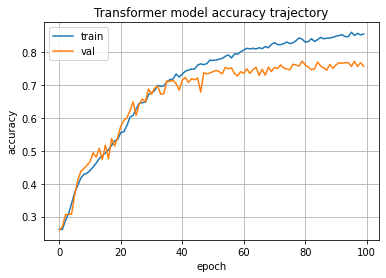

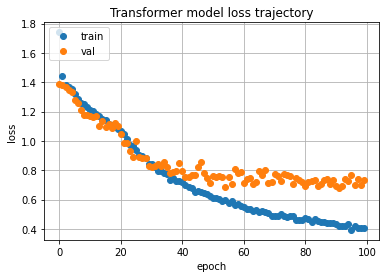

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_transformer.history['accuracy'])
plt.plot(history_transformer.history['val_accuracy'])
plt.title('Transformer model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history_transformer.history['loss'],'o')
plt.plot(history_transformer.history['val_loss'],'o')
plt.title('Transformer model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
inputs = layers.Input(shape=(22, 1000, 1))
x = layers.Conv2D(filters=40, kernel_size=(1,25))(inputs)
x = layers.Conv2D(filters=40, kernel_size=(22,44))(x)
x = layers.AveragePooling2D(pool_size=(1, 75), strides=(1, 15))(x)
x = layers.Flatten()(x)
x = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, x)
model.summary()

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_65 (InputLayer)       [(None, 22, 1000, 1)]     0         
                                                                 
 conv2d_205 (Conv2D)         (None, 22, 976, 40)       1040      
                                                                 
 conv2d_206 (Conv2D)         (None, 1, 933, 40)        1548840   
                                                                 
 average_pooling2d_8 (Averag  (None, 1, 58, 40)        0         
 ePooling2D)                                                     
                                                                 
 flatten_10 (Flatten)        (None, 2320)              0         
                                                                 
 dense_86 (Dense)            (None, 4)                 9284      
                                                          

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="weights_cnn.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
cnn_history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[model_checkpoint_callback])

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 1.7561 - accuracy: 0.3976
Epoch 1: val_accuracy improved from -inf to 0.36795, saving model to weights_cnn.hdf5
34/34 [==============================] - 86s 3s/step - loss: 1.7561 - accuracy: 0.3976 - val_loss: 1.5722 - val_accuracy: 0.3679
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 1.3537 - accuracy: 0.4567
Epoch 2: val_accuracy improved from 0.36795 to 0.39729, saving model to weights_cnn.hdf5
34/34 [==============================] - 86s 3s/step - loss: 1.3537 - accuracy: 0.4567 - val_loss: 1.4057 - val_accuracy: 0.3973
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 1.1735 - accuracy: 0.5092
Epoch 3: val_accuracy improved from 0.39729 to 0.44018, saving model to weights_cnn.hdf5
34/34 [==============================] - 86s 3s/step - loss: 1.1735 - accuracy: 0.5092 - val_loss: 1.2549 - val_accuracy: 0.4402
Epoch 4/100
34/34 [==============================] - ETA: 0s - l

KeyboardInterrupt: 

In [ ]:
model.load_weights("weights_cnn.hdf5")

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 2s 150ms/step - loss: 1.2090 - accuracy: 0.5350


[1.209013819694519, 0.5349887013435364]

In [ ]:
inputs = layers.Input(shape=(250, 1, 22))

x = layers.Conv2D(filters=25,  kernel_size=(10,1), activation="elu", padding="same")(inputs)
x = layers.LayerNormalization()(x)
x = layers.Conv2D(filters=50,  kernel_size=(10,1), activation="elu", padding="same")(x)
x = layers.LayerNormalization()(x)
x = layers.MaxPool2D(pool_size=(10,1))(x)
x = layers.Reshape(target_shape=(25,50))(x)
x = layers.Dropout(dropout)(x)
x = layers.LSTM(128, recurrent_dropout=dropout, return_sequences=True)(x)
x = layers.LSTM(256, recurrent_dropout=dropout)(x)
x = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 1, 22)]      0         
                                                                 
 conv2d (Conv2D)             (None, 250, 1, 25)        5525      
                                                                 
 layer_normalization (LayerN  (None, 250, 1, 25)       50        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 1, 50)        12550     
                                                                 
 layer_normalization_1 (Laye  (None, 250, 1, 50)       100       
 rNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 1, 50)        0     

In [ ]:
import time

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="weights_lstm.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

start = time.time()
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
lstm_history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=64, callbacks=[model_checkpoint_callback])
end = time.time()
wall_time_lstm = end - start

Epoch 1/100
109/109 [==============================] - ETA: 0s - loss: 1.3745 - accuracy: 0.2907
Epoch 1: val_accuracy improved from -inf to 0.37400, saving model to weights_lstm.hdf5
109/109 [==============================] - 17s 117ms/step - loss: 1.3745 - accuracy: 0.2907 - val_loss: 1.3341 - val_accuracy: 0.3740
Epoch 2/100
109/109 [==============================] - ETA: 0s - loss: 1.3261 - accuracy: 0.3657
Epoch 2: val_accuracy improved from 0.37400 to 0.38333, saving model to weights_lstm.hdf5
109/109 [==============================] - 12s 114ms/step - loss: 1.3261 - accuracy: 0.3657 - val_loss: 1.2829 - val_accuracy: 0.3833
Epoch 3/100
109/109 [==============================] - ETA: 0s - loss: 1.2756 - accuracy: 0.4039
Epoch 3: val_accuracy improved from 0.38333 to 0.43733, saving model to weights_lstm.hdf5
109/109 [==============================] - 13s 117ms/step - loss: 1.2756 - accuracy: 0.4039 - val_loss: 1.2074 - val_accuracy: 0.4373
Epoch 4/100
109/109 [===================

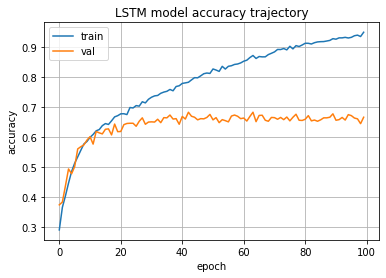

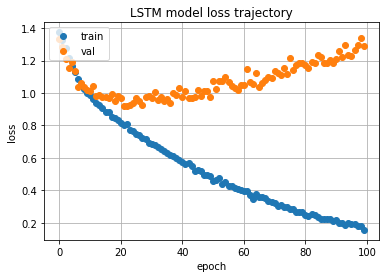

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

plt.plot(lstm_history.history['loss'],'o')
plt.plot(lstm_history.history['val_loss'],'o')
plt.title('LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
model.load_weights("weights_lstm.hdf5")

In [ ]:
model.evaluate(x_test, y_test)

56/56 [==============================] - 1s 12ms/step - loss: 1.1637 - accuracy: 0.6106


[1.163666844367981, 0.6106094717979431]

# Accuracy and Loss Trajectory - See CNN preprocessing notebook
# Wall Time Analysis